In [ ]:
import datasets

In [ ]:
dataset = datasets.load_dataset('microsoft/cats_vs_dogs')

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

In [ ]:
ds = dataset['train'].shuffle(seed=42).shard(num_shards=20, index=0)
ds

Dataset({
    features: ['image', 'labels'],
    num_rows: 1171
})

In [ ]:
from collections import Counter

In [ ]:
Counter(ds['labels'])

Counter({0: 588, 1: 583})

In [ ]:
ds = ds.train_test_split(test_size=0.1)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 1053
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 118
    })
})

In [ ]:
ds['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x500>,
 'labels': 1}

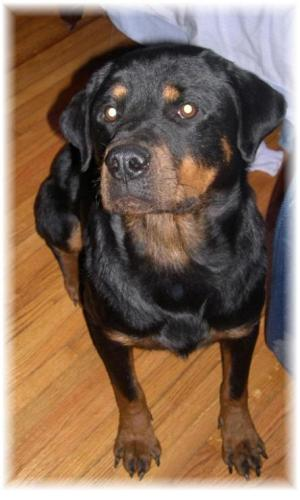

In [ ]:
ds['train'][0]['image']

In [ ]:
import timm

In [ ]:
timm.list_models('vgg*')

['vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']

In [ ]:
model = timm.create_model('vgg11', pretrained=True, num_classes=1)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
for param in model.parameters():
    param.requires_grad = False
for param in model.head.fc.parameters():
    param.requires_grad = True

In [ ]:
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-3                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-4                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-5                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-6                    [1, 128, 56, 56]          --
│    └─Conv2d: 2-7                       [1, 256, 56, 56]          (295,168)
│    └─ReLU: 2-8                         [1, 256, 56, 56]          --
│    └─Conv2d: 2-9                       [1, 256, 56, 56]          (590,080)
│    └─ReLU: 2-10                        [1, 256, 56, 56]          --
│    └─MaxPool2d: 2-11                   [1, 256, 28, 28]   

In [ ]:
data_cfg = timm.data.resolve_data_config(model.pretrained_cfg)
transform = timm.data.create_transform(**data_cfg)
transform

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
def transforms(examples):
    examples['image'] = [
        transform(image) for image in examples['image']
    ]

    return examples

In [ ]:
ds.set_transform(transforms)

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 1053
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 118
    })
})

In [ ]:
ds['train'][0]

{'image': tensor([[[ 0.3138,  0.2967,  0.2624,  ..., -1.0904, -0.9705, -0.7993],
          [ 0.2624,  0.2624,  0.2967,  ..., -0.9705, -0.8507, -0.7822],
          [ 0.2624,  0.2796,  0.3309,  ..., -0.9192, -0.9020, -0.9020],
          ...,
          [ 1.5468,  1.4954,  1.3927,  ...,  0.4851,  0.5878,  0.5022],
          [ 1.4954,  1.4269,  1.3584,  ...,  0.5364,  0.5707,  0.4851],
          [ 1.4440,  1.4612,  1.4098,  ...,  0.5536,  0.5022,  0.4679]],
 
         [[-0.5651, -0.5651, -0.6001,  ..., -0.9853, -0.8627, -0.6877],
          [-0.6176, -0.6176, -0.6001,  ..., -0.8803, -0.7577, -0.6877],
          [-0.6527, -0.6176, -0.5476,  ..., -0.8803, -0.8627, -0.8627],
          ...,
          [ 0.6429,  0.5728,  0.4678,  ..., -0.4776, -0.3550, -0.4251],
          [ 0.5903,  0.5028,  0.4328,  ..., -0.4251, -0.3550, -0.3901],
          [ 0.5378,  0.5378,  0.4853,  ..., -0.3725, -0.3725, -0.3375]],
 
         [[-1.0376, -1.0898, -1.1421,  ..., -0.7587, -0.6367, -0.4450],
          [-1.1073,

In [ ]:
ds['train'][0]['image'].shape

torch.Size([3, 224, 224])

In [ ]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.0648367].


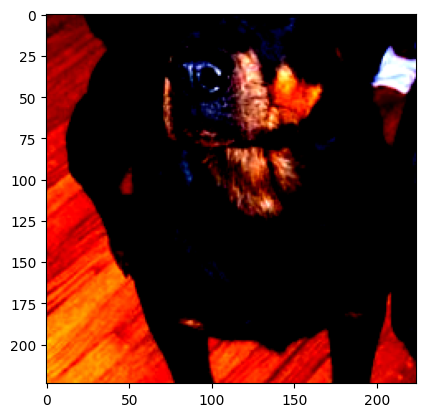

In [ ]:
plt.imshow(ds['train'][0]['image'].permute(1, 2, 0))
plt.show()

In [ ]:
import torch
from torch import nn
from torch import optim

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model = model.to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(ds['train'], batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(ds['test'], batch_size=32, shuffle=False, drop_last=False)

In [ ]:
batch = next(iter(train_loader))
batch['image'].shape, batch['labels'].shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
batch['image'].dtype

torch.float32

In [ ]:
batch['labels'].dtype

torch.int64

In [ ]:
output = model(batch['image'].to(device))
output.shape

torch.Size([32, 1])

In [ ]:
loss_fn(output.squeeze(), batch['labels'].float().to(device))

tensor(0.6615, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [ ]:
from torchmetrics.classification import Accuracy

In [ ]:
accuracy = Accuracy(task='binary').to(device)

In [ ]:
from tqdm import tqdm

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    model.train()
    train_epoch_losses, train_epoch_accuracies = [], []
    for batch in tqdm(train_loader):
        image = batch['image'].to(device)
        label = batch['labels'].to(device)
        output = model(image).squeeze()
        loss = loss_fn(output, label.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_epoch_losses.append(loss.item())
        accuracy(output, label)
    train_loss = (sum(train_epoch_losses) / len(train_epoch_losses))
    train_losses.append(train_loss)
    train_acc = accuracy.compute()
    train_accuracies.append(train_acc.item())
    accuracy.reset()

    with torch.inference_mode():
        model.eval()
        val_epoch_losses, val_epoch_accuracies = [], []
        for batch in tqdm(val_loader):
            image = batch['image'].to(device)
            label = batch['labels'].to(device)
            output = model(image).squeeze()
            loss = loss_fn(output, label.float())
            val_epoch_losses.append(loss.item())
            accuracy(output, label)
        val_loss = (sum(val_epoch_losses) / len(val_epoch_losses))
        val_losses.append(val_loss)
        val_acc = accuracy.compute()
        val_accuracies.append(val_acc.item())
        accuracy.reset()

    print(f"Epoch {epoch}")
    print(f"Train Loss: {train_loss:.4g}, Train Accuracy: {train_acc:.4g}")
    print(f"Val   Loss: {val_loss:.4g},   Val Accuracy: {val_acc:.4g}")

100%|██████████| 4/4 [00:00<00:00,  7.05it/s]


Epoch 0
Train Loss: 0.1502, Train Accuracy: 0.9502
Val   Loss: 0.09109,   Val Accuracy: 0.9492


100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


Epoch 1
Train Loss: 0.03926, Train Accuracy: 0.9912
Val   Loss: 0.09011,   Val Accuracy: 0.9407


100%|██████████| 4/4 [00:00<00:00,  7.35it/s]


Epoch 2
Train Loss: 0.02713, Train Accuracy: 0.9941
Val   Loss: 0.09767,   Val Accuracy: 0.9576


100%|██████████| 4/4 [00:00<00:00,  7.30it/s]


Epoch 3
Train Loss: 0.02174, Train Accuracy: 0.9951
Val   Loss: 0.09717,   Val Accuracy: 0.9407


100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

Epoch 4
Train Loss: 0.01629, Train Accuracy: 1
Val   Loss: 0.1019,   Val Accuracy: 0.9407


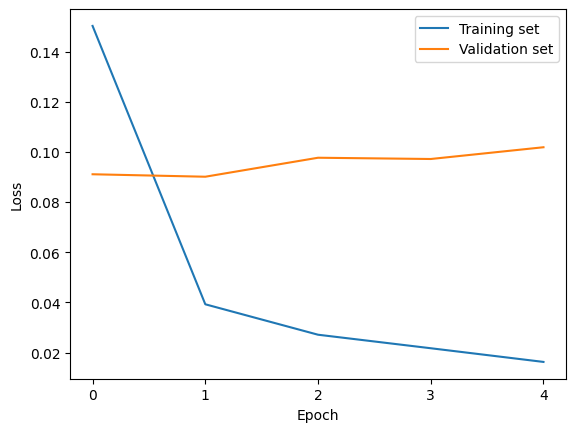

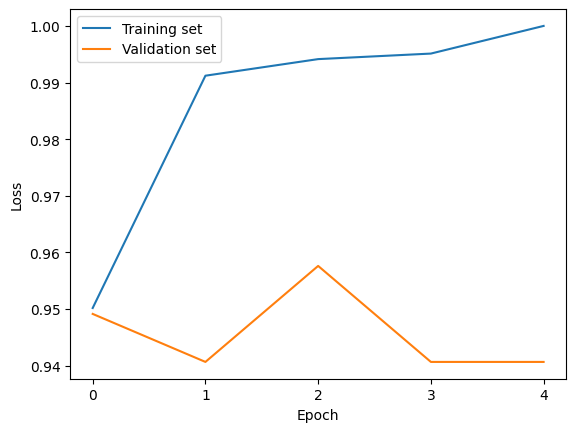

In [ ]:
plt.plot(train_losses, label="Training set")
plt.plot(val_losses, label="Validation set")
plt.xticks(range(5))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(train_accuracies, label="Training set")
plt.plot(val_accuracies, label="Validation set")
plt.xticks(range(5))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from torch.functional import F

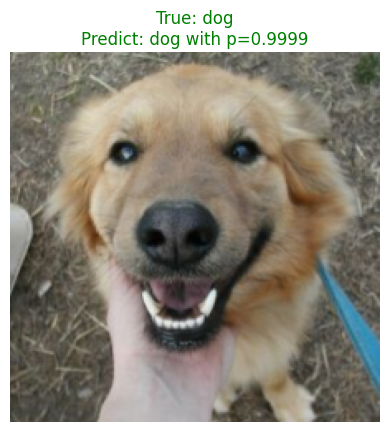

In [ ]:
id2label = {0: "cat", 1: "dog"}
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

idx = np.random.randint(0, len(ds['test']))
sample = ds['test'][idx]
image = sample['image'].unsqueeze(0).to(device)
label = sample['labels']
output = model(image).squeeze()
prob = F.sigmoid(output).item()  # probablity of label = 1 (dog)
pred = int(prob > 0.5)
probability = max(prob, 1 - prob)
true_label = id2label[label]
pred_label = id2label[pred]
color = "green" if true_label == pred_label else "red"

image = image.squeeze().permute(1, 2, 0).cpu().numpy()
image = std * image + mean
image = np.clip(image, 0, 1)
plt.imshow(image)
plt.axis("off")
plt.title(f"True: {true_label}\nPredict: {pred_label} with p={probability:.4f}", color=color)
plt.show()